In [6]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts = ['You are the Best',
         'You are the Nice']

tokenizer = Tokenizer(num_words=10, oov_token= '<OOV>')  #numword = 최대단어개수 oovtoken = 포함되지 않는 값 처리
tokenizer.fit_on_texts(texts)

# 텍스트 데이터를 정수 인덱스로 변환
sequences = tokenizer.texts_to_sequences(texts)

binary_results = tokenizer.sequences_to_matrix(sequences, mode = 'binary')

print(tokenizer.word_index)
print('--------------------')
print(f'sequences: {sequences}\n')
print(f'binary_vectors \n{binary_results}\n')

#one-hot-encoding
print(to_categorical(sequences))

test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences: {test_seq}')

[[2, 3, 4, 5], [2, 3, 4, 6]]
{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
--------------------
sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors 
[[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]
test sequences: [[2, 3, 4, 1]]


In [7]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train),(X_test, y_test) = imdb.load_data(num_words=num_words)

17464789/17464789 [==============================] - 0s 0us/step


In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [9]:
print(X_train[0])
print(y_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
1


In [14]:
type(imdb.get_word_index())

dict

In [17]:
imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
  imdb_get_word_index[value] = key

for i in range(1, 4):
  print('{}={}'.format(i, imdb_get_word_index[i]))

1=the
2=and
3=a


In [19]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print('Before pad_sequences: ', len(X_train[0]))

pad_X_train = pad_sequences(X_train, maxlen=max_len, padding = 'pre')
pad_X_test = pad_sequences(X_test, maxlen=max_len, padding = 'pre')
print('After pad_sequences: ', len(pad_X_train[0]))

Before pad_sequences:  218
After pad_sequences:  500


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()

model.add(Flatten())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['acc'])

In [24]:
history = model.fit(pad_X_train, y_train, batch_size = 32, epochs = 30, validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 3s 4ms/step - loss: 221.6328 - acc: 0.4997 - val_loss: 59.8465 - val_acc: 0.5032
Epoch 2/30
625/625 [==============================] - 1s 2ms/step - loss: 40.0687 - acc: 0.5066 - val_loss: 42.1382 - val_acc: 0.5082
Epoch 3/30
625/625 [==============================] - 2s 2ms/step - loss: 33.4606 - acc: 0.5002 - val_loss: 29.0983 - val_acc: 0.5068
Epoch 4/30
625/625 [==============================] - 2s 4ms/step - loss: 32.3733 - acc: 0.5016 - val_loss: 33.1463 - val_acc: 0.4988
Epoch 5/30
625/625 [==============================] - 1s 2ms/step - loss: 31.4236 - acc: 0.5023 - val_loss: 33.0455 - val_acc: 0.4990
Epoch 6/30
625/625 [==============================] - 1s 2ms/step - loss: 32.3740 - acc: 0.5031 - val_loss: 36.2861 - val_acc: 0.4984
Epoch 7/30
625/625 [==============================] - 1s 2ms/step - loss: 32.1469 - acc: 0.4982 - val_loss: 35.9913 - val_acc: 0.4910
Epoch 8/30
625/625 [==============================] - 1s 2ms/

In [25]:
model.evaluate(pad_X_test, y_test)

782/782 [==============================] - 1s 2ms/step - loss: 35.1109 - acc: 0.5054


[35.1108512878418, 0.5054000020027161]

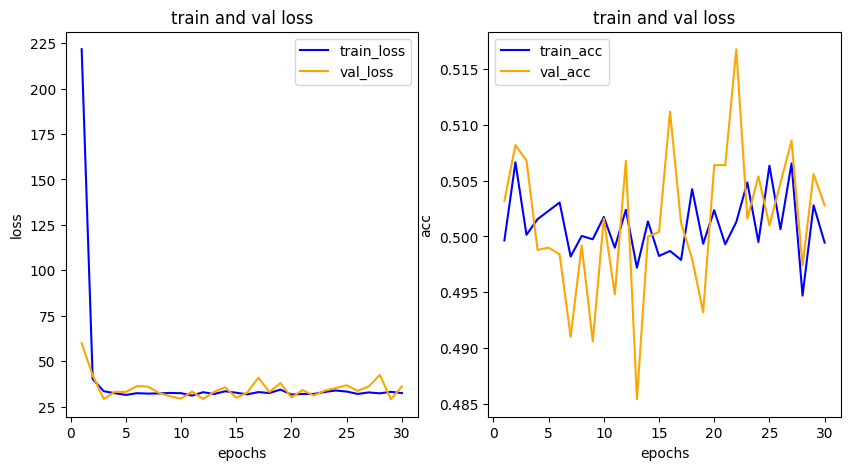

In [28]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val loss')
ax2.set_xlabel('epochs')
ax2.set_ylabel('acc')
ax2.legend()

plt.show()